# Project: Investigate a Dataset - [The Movie Database]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 


I will be analysing a Dataset collected from "The Movie Database (TMDb)". This dataset contains information about 10,000 movies including user ratings and revenue. Here I will be reviewing the genres of movies that has the most popularity, the properties of the movies that has the highest revenue and finally the profits made by each production company.

Ref: https://www.kaggle.com/tmdb/tmdb-movie-metadata

● Certain columns, like ‘cast’
and ‘genres’, contain multiple
values separated by pipe (|)
characters.

● The final two columns ending
with “_adj” show the budget and
revenue of the associated movie
in terms of 2010 dollars,
accounting for inflation over
time.



### Question(s) for Analysis


* Which genres are most popular from year to year? 

* What movie's genres has the high revenues?

* Did the production companies made enough profit or loss?



In [4]:
# Use this cell to set up import statements for all of the packages that you plan to use.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [14]:
# Upgraded pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [5]:
# loading TMDB Movie Data
df_tmdb = pd.read_csv('tmdb_movies.csv')
#The DataFrame's read_csv method is used to load data from text files

# view dimensions of dataset
print(df_tmdb.shape)

df_tmdb.head(5)
#head() function is used to view the first 10 rows so as to examine the data

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The data consists of the following columns:

* **Id:**	 		  A unique row identifier		
* **Imdb_id:**		  A unique The Movie Database (TMDb) identifier	
* **Popularity:**		  The popularity of the movies based on users assessment	
* **Budget:**		  The Budget of the Movie
* **Revenue:**		  The Revenue generated from the Movies
* **Original Title:**	  The Titke of the Movie
* **Cast:**			  The moves casts
* **Homepage:**		  The home page URL
* **Director:**		  The Movies Directors
* **Tagline:**		  The movies slogan
* **Keywords:**		  keywords to search the movies
* **Overview**		  Short summary of the movies	
* **Runtime:**		  The movies runtime/duration
* **Genres:**		  The Movie genres/category
* **Production Companies:**	  The Movie production company
* **Release Date:**		  The date the movie was released
* **Vote Count:**		  Movie total vote count
* **Vote Average:**		  Movie Average Vote count
* **Release Year:**		  The Year the movie was released
* **Budget Adj:**		  Movie Budget in terms of 2010 dollars, accounting for inflation over time
* **Revenue Adj:**		  Movie Revenue in terms of 2010 dollars, accounting for inflation over time

Here I will be dealing with incomplete or missing data. So how would I know that this DataFrame contains missing values? I will be using the isnull method to identify which individual values are null, like this:

In [6]:
df_tmdb.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


It would be inefficient to review all of the rows and columns individually with this large Dataframe; so I will get the sum of missing values for each column, like this:

In [116]:
df_tmdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Now I know that there're:
76 missing cast values,
7930 missing homepage values,
44 missing director values,
2824 missing tagline values,
1493 missing keywords values,
4 missing overview values,
23 Genres values and
1030 production companies values.

To see them in context, I will filter the dataframe to include only rows where any of the columns are null.
When the DataFrame is retrieved, the missing values show up as NaN (not a number).

In [117]:
df_tmdb[df_tmdb.isnull().any(axis=1)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.556818,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.8,2015,8.739996e+07,4.989630e+08
21,307081,tt1798684,5.337064,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.3,2015,2.759999e+07,8.437300e+07
26,214756,tt2637276,4.564549,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08
32,254470,tt2848292,3.877764,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/15,1264,6.8,2015,2.667999e+07,2.645056e+08
33,296098,tt3682448,3.648210,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.1,2015,3.679998e+07,1.496016e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


So now that I've found the null values, what can I do about them?

One common approach is to impute replacement values or drop the missing values. 
I could just assume that the missing value is just the mean vallue of the entire column, the value of the previous row, 
the next row value or even another column's value of the same row.
For example, I can decide to fill up the missing tagline values with the "original title" values or 
"cast" values with the "Director" values and vice-versa.
However, this will not give me the accurate results.

Alternatively, it might be important to ensure that I only use available data to be absolutely correct; 
so I can drop rows or columns that contains null values by using the dropna method. 
In this case, I shall consider removing rows where any of the columns contain null values.

But, from the result above (df_tmdb[df_tmdb.isnull().any(axis=1)]), I have 8871 rows that have null values, 
so dropping these rows as earlier proposed will lead to reduced data dimension and I will be left with only about 1992 rows out of 10866 rows. 
This is a very high margin and will resullt to incorrect result.

In contrast to dropping all the null rows, I shall be dropping only the null values in Genres column (23 missing values), 
since my data exploration will centre more on genres column and other numerical columns that does not have a null value.



### Data Cleaning



In [118]:
#dropping the null rows in Genres column
# Ref: https://www.geeksforgeeks.org/how-to-drop-rows-with-nan-values-in-pandas-dataframe/
df_tmdb.dropna(subset=['genres'], inplace=True)

# view dimensions of dataset
print(df_tmdb.shape)

#checking if the data removal has taken place
df_tmdb.isnull().sum()


(10843, 21)


id                         0
imdb_id                    8
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      75
homepage                7912
director                  42
tagline                 2806
keywords                1475
overview                   3
runtime                    0
genres                     0
production_companies    1016
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [119]:
# confirm the correction with info()
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10843 non-null  int64  
 1   imdb_id               10835 non-null  object 
 2   popularity            10843 non-null  float64
 3   budget                10843 non-null  int64  
 4   revenue               10843 non-null  int64  
 5   original_title        10843 non-null  object 
 6   cast                  10768 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10801 non-null  object 
 9   tagline               8037 non-null   object 
 10  keywords              9368 non-null   object 
 11  overview              10840 non-null  object 
 12  runtime               10843 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9827 non-null   object 
 15  release_date       

In [120]:
# check for duplicates in the data
df_tmdb.duplicated()
print(df_tmdb.duplicated().sum())
df_tmdb[df_tmdb.duplicated()]

1


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [121]:
# drop duplicates
df_tmdb.drop_duplicates(inplace=True)

# confirm correction by rechecking for duplicates in the data
df_tmdb.duplicated().sum()

0

In [223]:
df_tmdb['genres'].unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [388]:
# genres column has a hybrid value separated with "|"
hb_tmdb = df_tmdb[df_tmdb['genres'].str.contains('|')]

#To view the column content
hb_tmdb[0:5]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [242]:
# create two copies of the TMDB Movie hybrids dataframe
df1 = hb_tmdb.copy() 

# spliting Genres column  by "|"
split_columns = ['genres']

# apply split function to genres column of the dataframe copy
for c in split_columns:
    df1[c] = df1[c].apply(lambda x: x.split("|")[0])

In [239]:
#To view the unique values of the new genre column
df1['genres'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [247]:
#saving the new dataset as df_tmdb_v2
df1.to_csv('df_tmdb_v2.csv', index=False)

#importing the new dataset as df_tmdb_v
df_tmdb_v = pd.read_csv('df_tmdb_v2.csv')
df_tmdb_v.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Now that I've trimmed and cleaned up the data, I am ready to explore the data in the DataFrame

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : Which genres are most popular from year to year?

In [249]:
# Display the statistical data of the dataframe
df_tmdb_v.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


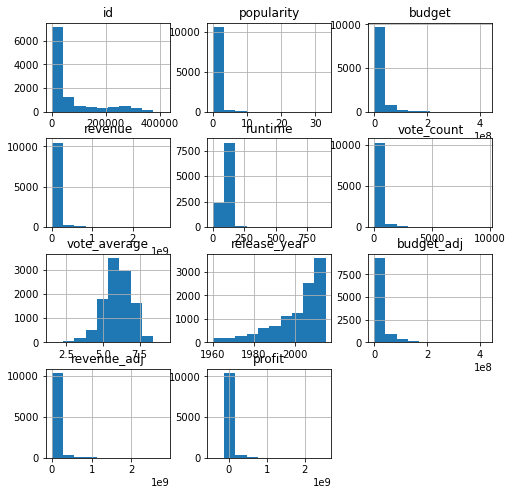

In [361]:
#checking the data for further cleaning
df_tmdb_v.hist(figsize=(8,8));

In [250]:
#group the record by genres and release year
grouped_by_gen_year= df_tmdb_v.groupby(['genres','release_year'])
more_popular= grouped_by_gen_year.count()['popularity']
print(more_popular)


genres   release_year
Action   1960            8
         1961            3
         1962            5
         1963            3
         1964            2
                        ..
Western  2006            1
         2007            1
         2013            2
         2014            3
         2015            2
Name: popularity, Length: 829, dtype: int64


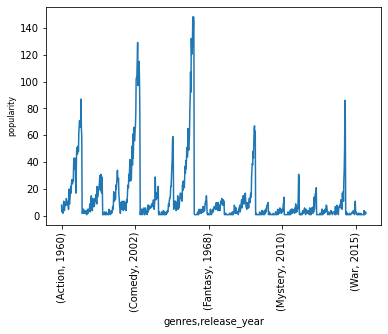

In [364]:
#plot a graph to display genres more popular from year to year

more_popular.plot()
plt.xticks(rotation=90)
plt.ylabel('popularity', fontsize=8)
plt.show(20)

From the first 20 data displayed, the Comedy genres movies has the highest popularity 2002 and beyond, followed by the Action movies then the War genres movies

In [262]:
#group the record by genres and count by popularity
grouped_by_year= df_tmdb_v.groupby(['genres'])
more_popular_year= grouped_by_gen_year.count()['popularity'][0:30]
print(more_popular_year)


genres  release_year
Action  1960             8
        1961             3
        1962             5
        1963             3
        1964             2
        1965             8
        1966            11
        1967             5
        1968             4
        1969             7
        1970            10
        1971             8
        1972             9
        1973            13
        1974            11
        1975             8
        1976            10
        1977             8
        1978            11
        1979             5
        1980            20
        1981            10
        1982             9
        1983            13
        1984            17
        1985            22
        1986            17
        1987            24
        1988            27
        1989            24
Name: popularity, dtype: int64


<AxesSubplot:xlabel='genres,release_year'>

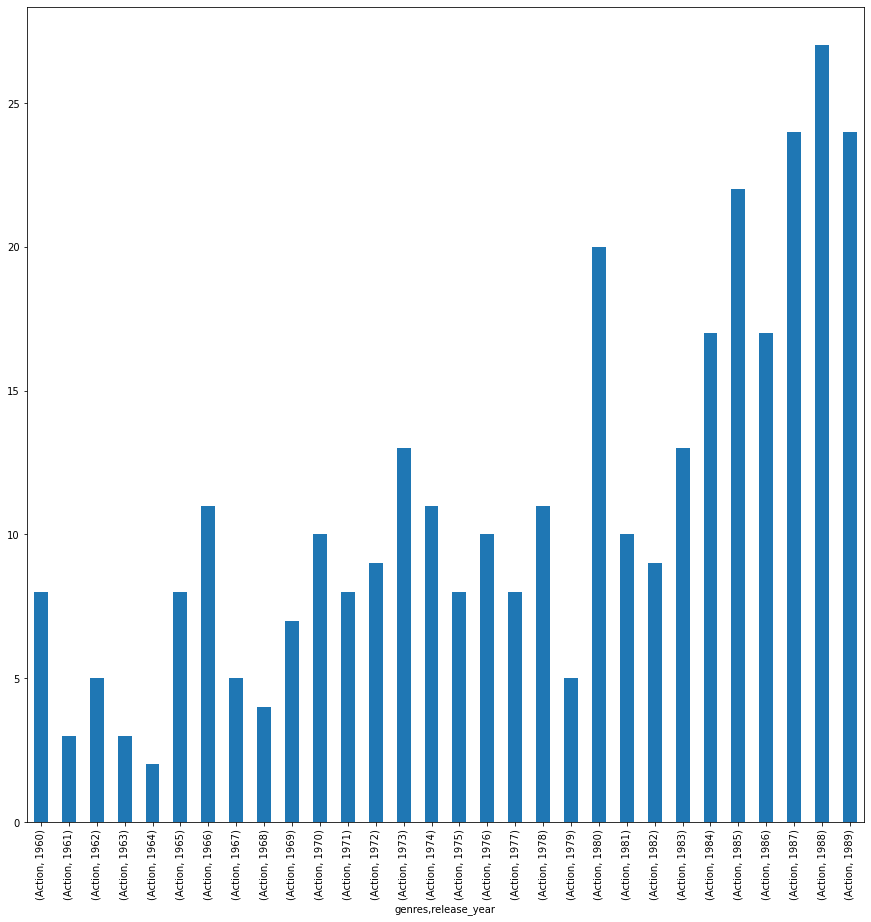

In [282]:
#plotting the graph of movie genre that has the highest pupolarity
more_popular_year.plot(y=['release_year'], x=['genres'], rot=90, kind='bar', figsize=(15,15))

The first thirty data shows the popularity of the Action movies from year to year.
The popularity fluctuates from one year to another until year 1988 where it huts its 
zenith of about 37 points and it dropped again to 24 points in 1989. 
This means that the interest for action movies was not stable from year to year.

In [3]:
df_tmdb_v['release_year'].plot(kind = 'hist', figsize = (15,15))
plt.title('Number of released movie per year', fontsize = 18)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of movies', fontsize=12)
plt.show()

NameError: name 'df_tmdb_v' is not defined

In [2]:
# creating a fuction that will be used for the remaining visualizations

def plot(df,x,y,title,xlabel,ylabel):
    fig = plt.figure(figsize=(15,15))
    plt.scatter(x,y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim(0,10)
    return plt.show()


In [ ]:
def plot(df_tmdb_v,'release_year',y,title,xlabel,ylabel):
    fig = plt.figure(figsize=(15,15))
    plt.scatter(x,y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.xlim(0,10)
    return plt.show()



This shows that the number movies produced increases from year to year. 
In 2005, it experienced a tremendious increase and in 2010, it hits its zenith.

# Research Question 2 :  What movie's genres has the high revenues?

In [270]:
#Extracting the movies genres that has the highet revenue
highest_rev = df_tmdb_v.groupby(['genres']).sum()['revenue']
print(highest_rev)


genres
Action             96606072845
Adventure          73107006764
Animation          28797048213
Comedy             67952461496
Crime              12705800478
Documentary          852211592
Drama              61678301024
Family              8854452778
Fantasy            18303948327
Foreign                      0
History             1951867180
Horror             15432626119
Music               2304615926
Mystery             3019881629
Romance             7046888501
Science Fiction    17046401611
TV Movie              42000000
Thriller           13003269735
War                 2708551908
Western             1305819749
Name: revenue, dtype: int64


<AxesSubplot:title={'center':'Movies with higher revenue'}, xlabel='genres'>

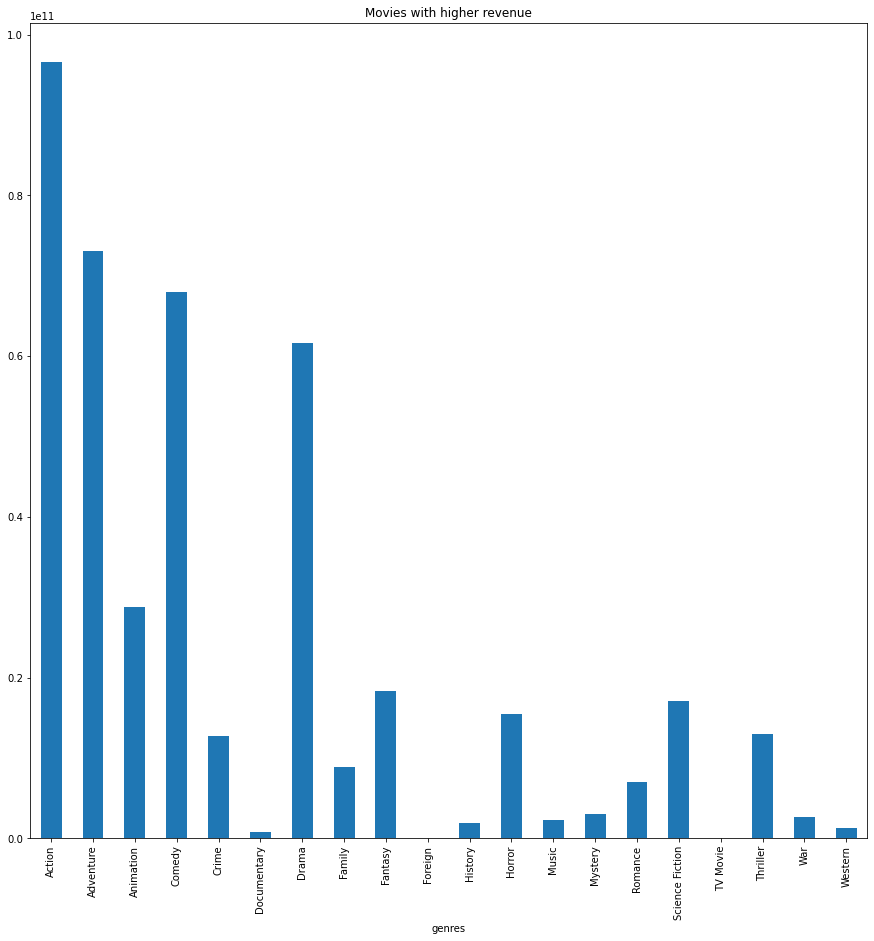

In [284]:
#ploting the graph of revenue against the genres 
highest_rev.plot(y=['Revenue'], x=['Genres'], title='Movies with higher revenue', rot=90, kind='bar', figsize=(15,15))


The action movies hit the highest revenue, followed by Adventure and comedy. 
This means there was a lot of purchases made on action movies than other genres 
i.e. more people prefer action movies to other genres.

<AxesSubplot:title={'center':'Movies revenue generated'}, ylabel='revenue'>

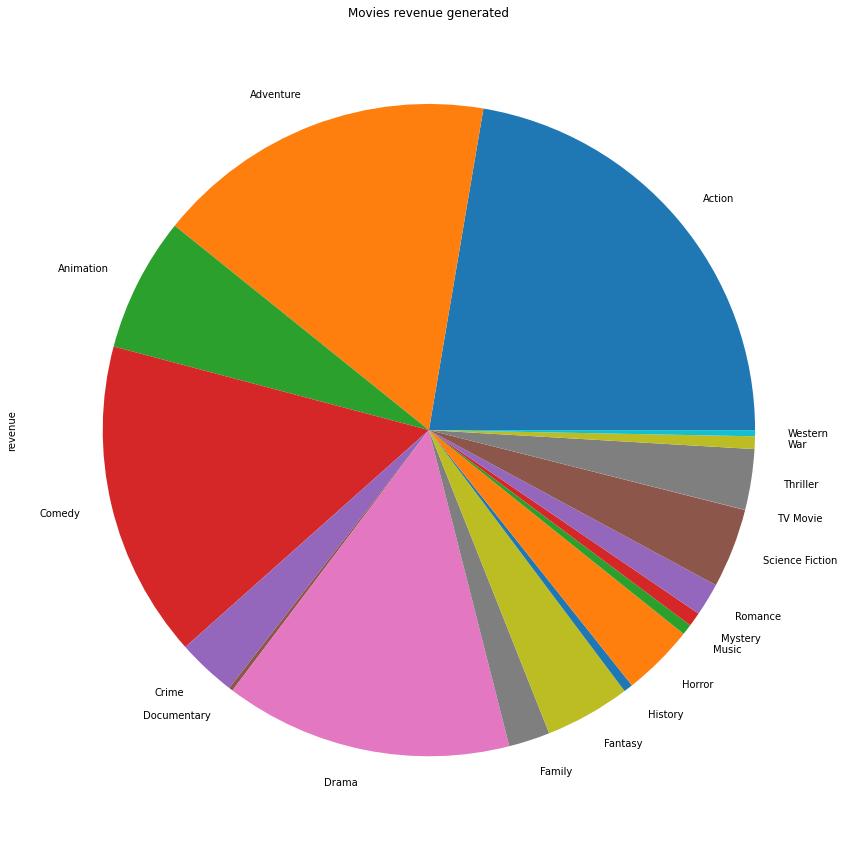

In [357]:
#using pie chart to compare the values
highest_rev.plot(kind='pie',title='Movies revenue generated', figsize=(15,15))

A pie chart was used to compare the revenue generated by each of the movies genres

### Research Question 3 :  Did the production companies made enough profit or loss?

In [385]:
#https://stackoverflow.com/questions/48350850/subtract-two-columns-in-dataframe

#subtracting the Budget from the Revenue to get the profit and creating a new column for the profit
df_tmdb_v['profit']=df_tmdb_v['revenue'] - df_tmdb_v['budget']
df_tmdb_v['profit']

#Extracting company with the highest profit
highest_profit=df_tmdb_v.groupby(['production_companies'])['profit'].sum().sort_values(ascending=False)[0:15]
highest_profit

production_companies
Paramount Pictures                                                                                            5978839360
Walt Disney Pictures|Pixar Animation Studios                                                                  5791558520
Marvel Studios                                                                                                4676908966
DreamWorks Animation                                                                                          4629741096
Blue Sky Studios|Twentieth Century Fox Animation                                                              3305820202
Columbia Pictures                                                                                             3245859137
Universal Pictures|Illumination Entertainment                                                                 2851800871
Ingenious Film Partners|Twentieth Century Fox Film Corporation|Dune Entertainment|Lightstorm Entertainment    2544505847
Universal P

Text(0, 0.5, 'Profit')

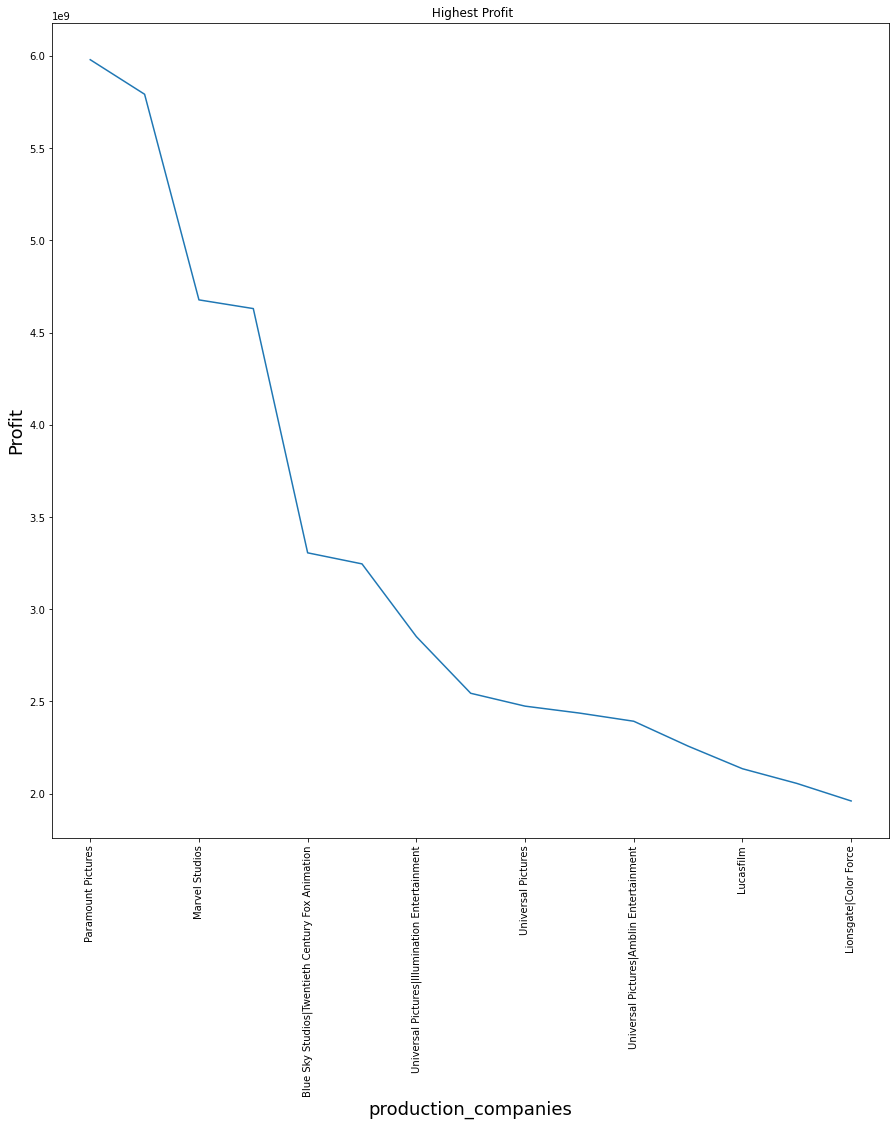

In [386]:
#Plotting graph of the profit against production companies 
highest_profit.plot(x='production_companies', y='profit',title=' Highest Profit',rot=90, kind = 'line', figsize=(15,15))
plt.xlabel('production_companies', fontsize=18)
plt.ylabel('Profit', fontsize=18)




The Paramount Pictures made the highest profit of about USD 5.9 Million, followed by Marvel studios of about USD 5.7 Million, followed by Blue Sky studios and others.

<a id='conclusions'></a>
## Conclusions

TDMB dataset gave me great insghts on the progress report of the Movie Industry from 1970s to early 20s. This insights came through some exploratory Data analysis used to answer some research questions as regards to the progress of the movie industry. Below are my findings:

There has been a tremendious growth over the periods in the movie industry in term of Popularity, revenue genrated and profit made by these movie Production compnies.
The observable growths are as follows:

Movie Popularity
- In the 2002 and beyond, the Comedy movies hits its highest popularity, followed by the Action movies then the War movies and others
- In 1970s to 1980s, the Action movies has been the one taking the lead in popularity, however, they have been 
   fluctuating over the period until year 1988 where it hits its zenith of about 27 points and dropped again to 24 points in 1989. 
- This means that there were a bit shift of interest in Action movies over the period.

Number of Movies Produced
- The analysis shows that there were massive increase in the number movies produced from year to year 
- In 2005 down to 2010, there was a geometric progression in the number Movies produced.
- This shows that the Movie industry was growth faster than expected in 20s.

Revenue Generated
- In the area of Revenue genarated, categorizing the revenue based on the movie genres, 
  The analysis shows that The action movies generated the highest revenue compared with others, followed by Adventure and comedy. 
  This made the producers to venture more into action movies as there were more action movies than others from the analysis.

Profit Gained By Production Companies
- Categorizing the profit gained by Production Companies, analysis shows that the "Paramount Pictures" made the highest profit of about USD 5.9 Million, 
  followed  by  "Marvel studios" of about USD 5.7 Million, followed  by  "Blue Sky studios" of about USD 4.6 Million and others.

## Limitations
- There were about 8871 rows with null values out of 10866 rows contained in the dataset, so dropping these rows as earlier proposed would have lead to incorrect result.
- There were zero values in the Budget column which were not dropped for the sake of accurate result result
- The Genre column had null values that were dropped inorder to get accurate result as the analysis centered more on the genred column
- The Genre and Production companies columns has hybrid values separated by "|", which made it difficult to get the exact category of data needed. So The Genre column was splited to get accurate category.


In [389]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1